In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import ppscore as pps
import seaborn as sns
from skimage.filters import threshold_otsu
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt # plotting

In [8]:
class Node:
    def __init__(self, name):
        self.name = name
class Edge:
    def __init__(self, startNode, endNode, score):
        self.startNode = startNode
        self.endNode = endNode
        self.score = score

Mean threshold:  0.13159633318599412
Otsu threshold:  0.279296875


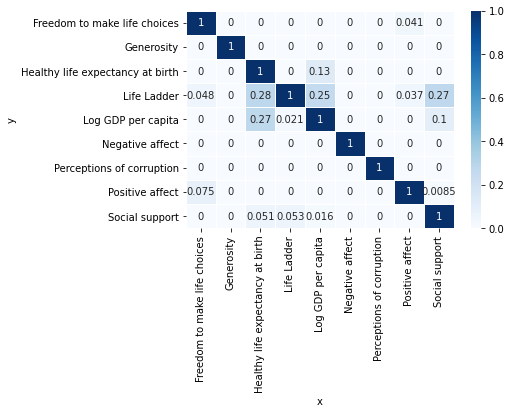

In [5]:
# Get data
data = pd.read_csv("./../data/world-happiness/world-happiness-report.csv", encoding="windows-1252")
data_num = data[data.columns[2:]]
data_ndarray = data_num.to_numpy()
data_ndarray[np.isnan(data_ndarray)] = 0 # Fill 0 to NaN values

# PPS
pps_df = pps.matrix(data_num)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(pps_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
pps_ndarray = pps_df.to_numpy()

# Threshold
mean_th = np.sum(pps_ndarray)/(len(pps_ndarray)*len(pps_ndarray))
otsu_th = threshold_otsu(pps_ndarray)
print("Mean threshold: ", mean_th)
print("Otsu threshold: ", otsu_th)

In [10]:
# Filter features by Otsu
nodeList = []
edgeList = []

# Loop for each element in pps matrix
for i in range(len(pps_ndarray)):
    for j in range(i+1,len(pps_ndarray)):
        # create node
        startNode = Node(pps_df.columns[i])
        endNode = Node(pps_df.columns[j])
        # check score with the threshold
        if pps_ndarray[i][j] >= otsu_th:
            nodeList.append(startNode)
            nodeList.append(endNode)
            # check opposite cell with the threshold
            if pps_ndarray[j][i] >= otsu_th:
                sub_score = pps_ndarray[i][j] - pps_ndarray[j][i]
                sum_score = pps_ndarray[i][j] + pps_ndarray[j][i]
                if sub_score >= 0:
                    edgeList.append(Edge(startNode, endNode, sum_score))
                else:
                    edgeList.append(Edge(endNode, startNode, sum_score))
            else:
                edgeList.append(Edge(startNode, endNode, pps_ndarray[i][j]))
        # check opposite cell with the threshold
        elif pps_ndarray[j][i] >= otsu_th:
            nodeList.append(startNode)
            nodeList.append(endNode)
            edgeList.append(Edge(endNode, startNode, pps_ndarray[j][i]))

# remove duplicates
nodeList = list(dict.fromkeys(nodeList))
        
# for i in range(len(data.columns)):
    
# # model
# model = KMeans(n_clusters=4).fit(data_ndarray)
# clusters = model.cluster_centers_
# print(model.inertia_)


# # print(data[data.columns[2:]])
# matrix_df = pps.matrix(data[data.columns[2:]])[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
# sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

[<__main__.Node object at 0x00000242390887F0>, <__main__.Node object at 0x000002424F08F310>]
